In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, norm
from tqdm import tqdm

def inv_logit(x):
    return 1 / (1 + np.exp(-x))

## Intuition building

SpearmanrResult(correlation=0.5074263971579254, pvalue=1.4042348633102345e-40)
SpearmanrResult(correlation=0.5902351102859823, pvalue=1.3361884064449196e-57)


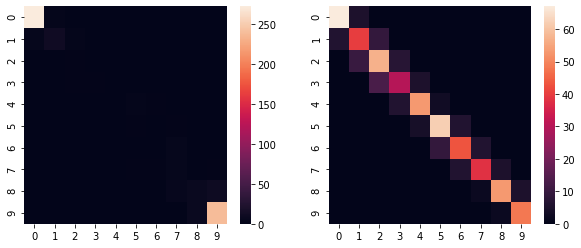

In [38]:
from sklearn.metrics import confusion_matrix

n_subj = 600
n_item = 9

J = np.repeat(np.arange(n_subj), n_item)
K = np.tile(np.arange(n_item), n_subj)

cov = [[1,0.6],[0.6,1]]
theta, z = np.random.multivariate_normal([0,0],cov,n_subj).T

alpha = np.ones(n_item) * 20

fig, axes = plt.subplots(1,2,figsize=(10,4))

beta = np.zeros(n_item)
mu = inv_logit(alpha[K] * (theta[J] - beta[K])).reshape(n_subj, n_item)
Y = np.random.binomial(1,mu)
c_true = np.round(mu.sum(axis=1))
c_pred = Y.sum(axis=1)
sns.heatmap(confusion_matrix(c_true, c_pred), ax=axes[0])
print(spearmanr(z, c_pred))

beta = norm.ppf(np.linspace(0.1,0.9,n_item))
mu = inv_logit(alpha[K] * (theta[J] - beta[K])).reshape(n_subj, n_item)
Y = np.random.binomial(1,mu)
c_true = np.round(mu.sum(axis=1))
c_pred = Y.sum(axis=1)
sns.heatmap(confusion_matrix(c_true, c_pred), ax=axes[1])
print(spearmanr(z, c_pred))

<AxesSubplot:>

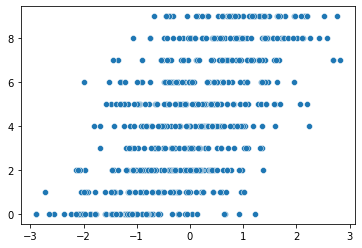

In [39]:
sns.scatterplot(x=z, y=c_pred)

In [26]:
x = np.arange(5000) % 2
y = np.random.binomial(1, np.where(x, 0.95, 0.05))

In [27]:
spearmanr(x,y)

SpearmanrResult(correlation=0.9076006534727057, pvalue=0.0)

## Controlled Conditions

#### uniform difficulty

In [ ]:
rvals = np.zeros((1000,3))

for i in tqdm(range(1000)):

    ## Define parameters.
    theta = np.random.normal(0,1,500)
    beta  = np.repeat(np.linspace(-2.2, 2.2, 10), 3)
    alpha = np.tile([0.5,1.0,1.5], beta.size)

    ## Define metadata.
    J = np.repeat(np.arange(theta.size), beta.size)
    K = np.tile(np.arange(beta.size), theta.size)

    ## Simulate data.
    mu = inv_logit(alpha[K] * (theta[J] - beta[K]))
    Y = np.random.binomial(1,mu).reshape(theta.size,beta.size)

    ## Compute correlations.
    for j in range(3):
        rvals[i,j], _ = spearmanr(theta, Y[:,j::3].mean(axis=1))
        
for i, color in enumerate(sns.color_palette(n_colors=3).as_hex()):
    sns.histplot(rvals[:,i], color=color)

#### normally distributed difficulty

In [ ]:
rvals = np.zeros((1000,3))

for i in tqdm(range(1000)):

    ## Define parameters.
    theta = np.random.normal(0,1,500)
    beta  = np.repeat(norm.ppf(np.linspace(0.025,0.975,10)), 3)
    alpha = np.tile([0.5,1.0,1.5], beta.size)

    ## Define metadata.
    J = np.repeat(np.arange(theta.size), beta.size)
    K = np.tile(np.arange(beta.size), theta.size)

    ## Simulate data.
    mu = inv_logit(alpha[K] * (theta[J] - beta[K]))
    Y = np.random.binomial(1,mu).reshape(theta.size,beta.size)

    ## Compute correlations.
    for j in range(3):
        rvals[i,j], _ = spearmanr(theta, Y[:,j::3].mean(axis=1))
        
for i, color in enumerate(sns.color_palette(n_colors=3).as_hex()):
    sns.histplot(rvals[:,i], color=color)

## Random discriminations 

#### uniform difficulty

In [ ]:
rvals = np.zeros((1000,3))

for i in tqdm(range(1000)):

    ## Define parameters.
    theta = np.random.normal(0,1,500)
    beta  = np.repeat(np.linspace(-2.2, 2.2, 10), 3)
    alpha = np.exp(np.random.normal(0, 0.33, beta.size))
    alpha = np.sort(alpha.reshape(10,3), axis=1).flatten()
    
    ## Define metadata.
    J = np.repeat(np.arange(theta.size), beta.size)
    K = np.tile(np.arange(beta.size), theta.size)

    ## Simulate data.
    mu = inv_logit(alpha[K] * (theta[J] - beta[K]))
    Y = np.random.binomial(1,mu).reshape(theta.size,beta.size)

    ## Compute correlations.
    for j in range(3):
        rvals[i,j], _ = spearmanr(theta, Y[:,j::3].mean(axis=1))
        
for i, color in enumerate(sns.color_palette(n_colors=3).as_hex()):
    sns.histplot(rvals[:,i], color=color)

#### normally distributed difficulty

In [ ]:
rvals = np.zeros((1000,3))

for i in tqdm(range(1000)):

    ## Define parameters.
    theta = np.random.normal(0,1,500)
    beta  = np.repeat(norm.ppf(np.linspace(0.025,0.975,10)), 3)
    alpha = np.exp(np.random.normal(0, 0.33, beta.size))
    alpha = np.sort(alpha.reshape(10,3), axis=1).flatten()
    
    ## Define metadata.
    J = np.repeat(np.arange(theta.size), beta.size)
    K = np.tile(np.arange(beta.size), theta.size)

    ## Simulate data.
    mu = inv_logit(alpha[K] * (theta[J] - beta[K]))
    Y = np.random.binomial(1,mu).reshape(theta.size,beta.size)

    ## Compute correlations.
    for j in range(3):
        rvals[i,j], _ = spearmanr(theta, Y[:,j::3].mean(axis=1))
        
for i, color in enumerate(sns.color_palette(n_colors=3).as_hex()):
    sns.histplot(rvals[:,i], color=color)

## number of items

In [ ]:
rvals = np.zeros((1000,3))

for i in tqdm(range(1000)):

    ## Define parameters.
    theta = np.random.normal(0,1,500)
    beta  = np.repeat(norm.ppf(np.linspace(0.025,0.975,9)), 3)
    alpha = np.exp(np.random.normal(0, 0.5, beta.size))
    alpha = np.sort(alpha.reshape(-1,3), axis=1).flatten()
    
    ## Define metadata.
    J = np.repeat(np.arange(theta.size), beta.size)
    K = np.tile(np.arange(beta.size), theta.size)

    ## Simulate data.
    mu = inv_logit(alpha[K] * (theta[J] - beta[K]))
    Y = np.random.binomial(1,mu).reshape(theta.size,beta.size)

    ## Compute correlations.
    for j in range(3):
        rvals[i,j], _ = spearmanr(theta, Y[:,j::3].mean(axis=1))
        
for i, color in enumerate(sns.color_palette(n_colors=3).as_hex()):
    sns.histplot(rvals[:,i], color=color)

In [ ]:
alpha.shape